<a href="https://colab.research.google.com/github/bolby0216/myrepository2/blob/master/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#tensorflow 1.13.1 버전을 설치합니다.
!pip install tensorflow-gpu==1.13.1

In [0]:
#그에 맞는 CUDA 버전도 설치해줍니다.
!apt-get --purge remove "*cublas*" "cuda*"
!reboot
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
!sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
!apt install cuda-10-0
!reboot

In [0]:
!pip install ipython-autotime
 
%load_ext autotime

In [2]:
import tensorflow as tf
import numpy as np
from IPython.display import Image

#MNIST 데이터 불러오기
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape)
print(x_test.shape)

dddd = x_test

#test set에서 validation set을 10000개 만큼 분리해줍니다. 이는 validation accuracy가 진전되지 않을때 overfitting을 막기위해 사용됩니다.
x_val  = x_train[50000:60000]
x_train = x_train[0:50000]
y_val  = y_train[50000:60000]
y_train = y_train[0:50000]

print("train data has " + str(x_train.shape[0]) + " samples")
print("every train data is " + str(x_train.shape[1]) 
      + " * " + str(x_train.shape[2]) + " image")

print("validation data has " + str(x_val.shape[0]) + " samples")
print("every train data is " + str(x_val.shape[1]) 
      + " * " + str(x_train.shape[2]) + " image")

print("test data has " + str(x_test.shape[0]) + " samples")
print("every test data is " + str(x_test.shape[1]) 
      + " * " + str(x_test.shape[2]) + " image")

#flattening을 해줍니다
x_train = x_train.reshape(50000, 784)
x_val = x_val.reshape(10000, 784)
x_test = x_test.reshape(10000, 784)

print(x_train.shape)
print(x_test.shape)

#정규화를 해줍니다
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

gray_scale = 255
x_train /= gray_scale
x_val /= gray_scale
x_test /= gray_scale

#one hot encoding
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
train data has 50000 samples
every train data is 28 * 28 image
validation data has 10000 samples
every train data is 28 * 28 image
test data has 10000 samples
every test data is 28 * 28 image
(50000, 784)
(10000, 784)


In [0]:
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

In [0]:
def mlp(x):
    keep_prob = tf.placeholder(tf.float32)
    # hidden layer1
    w1 = tf.Variable(tf.random_uniform([784,256]))
    b1 = tf.Variable(tf.zeros([256]))
    h1 = tf.nn.relu(tf.matmul(x, w1) + b1)
    h1 = tf.nn.dropout(h1, keep_prob=0.7)
    # hidden layer2
    w2 = tf.Variable(tf.random_uniform([256,128]))
    b2 = tf.Variable(tf.zeros([128]))
    h2 = tf.nn.relu(tf.matmul(h1, w2) + b2)
    h2 = tf.nn.dropout(h2, keep_prob=0.7)
    # output layer
    w3 = tf.Variable(tf.random_uniform([128,10]))
    b3 = tf.Variable(tf.zeros([10]))
    logits= tf.matmul(h2, w3) + b3
    
    return logits

In [0]:
logits = mlp(x)

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=logits, labels=y))

train_op = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss_op)

epoch: 0, train accuracy: 0.10702, validation accuracy: 0.1111, loss: 12580.708217773436
epoch: 1, train accuracy: 0.13792, validation accuracy: 0.1359, loss: 300.71272068023694
epoch: 2, train accuracy: 0.14636, validation accuracy: 0.1469, loss: 2.2257541847229
epoch: 3, train accuracy: 0.19704, validation accuracy: 0.21, loss: 2.18338020324707
epoch: 4, train accuracy: 0.22654, validation accuracy: 0.2335, loss: 2.1216078615188594
epoch: 5, train accuracy: 0.25292, validation accuracy: 0.2666, loss: 2.0508502388000487
epoch: 6, train accuracy: 0.28436, validation accuracy: 0.2963, loss: 1.994020414352417
epoch: 7, train accuracy: 0.30868, validation accuracy: 0.3266, loss: 1.929584820270538
epoch: 8, train accuracy: 0.3323, validation accuracy: 0.3358, loss: 1.865729656219483
epoch: 9, train accuracy: 0.34752, validation accuracy: 0.3562, loss: 1.8163259100914002
epoch: 10, train accuracy: 0.36494, validation accuracy: 0.3703, loss: 1.775267539024353
epoch: 11, train accuracy: 0.379

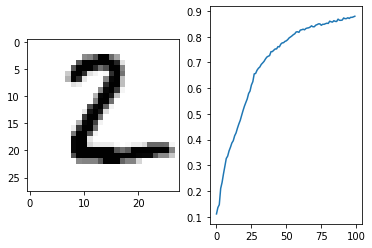

time: 3min 36s


In [33]:
import matplotlib.pyplot as plt


# 초기화
init = tf.global_variables_initializer()

# 하이퍼 파라미터
epoch_cnt = 100 #학습횟수
batch_size = 1000 #학습률
iteration = len(x_train) // batch_size

#graph x,y
graph_x = list(range(epoch_cnt))
graph_y = []

start = time.time()
# 훈련 시작
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epoch_cnt):
        avg_loss = 0.
        start = 0; end = batch_size
        
        for i in range(iteration):
            _, loss = sess.run([train_op, loss_op], 
                               feed_dict={x: x_train[start: end], y: y_train[start: end]})
            start += batch_size; end += batch_size
            # 평균 loss 계산
            avg_loss += loss / iteration
            
        # 모델 validate
        preds = tf.nn.softmax(logits)  #logit값에 활성화함수 softmax를 적용
        correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(y, 1))
        # 정확도 계산
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        cur_val_acc = accuracy.eval({x: x_val, y: y_val})
        graph_y.append(cur_val_acc)
        #
        preds = tf.nn.softmax(logits)  #logit값에 활성화함수 softmax를 적용
        correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        train_accuracy = accuracy.eval({x: x_train, y: y_train})
        #
        print("epoch: "+str(epoch)+", train accuracy: "+ str(train_accuracy) +", validation accuracy: " 
              + str(cur_val_acc) +', loss: '+str(avg_loss))
    
    # 모델 테스트
    preds = tf.nn.softmax(logits)  # Apply softmax to logits
    correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(y, 1))
    # 정확도 계산
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("[Test Accuracy] :", accuracy.eval({x: x_test, y: y_test}))

    # 테스트를 위해 임의의 MNIST 이미지를 넣어줍니다
    keep_prob = tf.placeholder(tf.float32)
    prediction=tf.argmax(preds,1)
    predint = prediction.eval(feed_dict={x: [x_test[1]],keep_prob: 1.0}, session=sess)
    # 예측값을 출력
    print("[Predicted Number] :", predint[0])

    # 예측값이 맞는지 비교하기 위해 해당 MNIST 이미지를 보여줍니다
    plt.subplot(1, 2, 1)
    plt.imshow(dddd[1], cmap=plt.cm.binary)

    # validation accuracy의 지표를 그래프로 나타냅니다
    plt.subplot(1, 2, 2)
    plt.plot(graph_x, graph_y)
    plt.show()


In [18]:
import tensorflow
print(tensorflow.__version__)

1.13.1
time: 1.1 ms
